In [1]:
import json
from collections import Counter, defaultdict, deque
import gc

import numpy as np
import pandas as pd
import glob
import time
from tqdm import tqdm

from sklearn import model_selection, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn

import lightgbm as lgb
from scipy.stats import skew

import feather
import pickle
import h5py

from concurrent import futures
#import riiideducation

In [2]:
sakami = pd.read_csv("./sakami-1221.csv")
sakami2 = np.load("./sakami-134pp.npy")
sakami["sakami2"] = sakami2
pocket_1221 = pd.read_csv("./pred_1221.csv")
pocket_1223 = pd.read_csv("./pred_1223.csv")
pocket_1226 = pd.read_csv("./pred_1226.csv")
owruby = pd.read_csv("./owruby_v022.csv")
owruby2_1 = pd.read_csv("./owruby_v026_1.csv")
owruby2_2 = pd.read_csv("./owruby_v026_2.csv")
owruby2_3 = pd.read_csv("./owruby_v026_3.csv")
owruby2_4 = pd.read_csv("./owruby_v026_4.csv")
merged = owruby.copy()
merged["pocket_1221"] = pocket_1221
merged["pocket_1223"] = pocket_1223
merged["pocket_1226"] = pocket_1226
merged["owruby"] = merged["answered_correctly"]
merged["owruby2_1"] = owruby2_1["answered_correctly"]
merged["owruby2_2"] = owruby2_2["answered_correctly"]
merged["owruby2_3"] = owruby2_3["answered_correctly"]
merged["owruby2_4"] = owruby2_4["answered_correctly"]
merged.drop(columns="answered_correctly", inplace=True)
merged2 = pd.merge(merged, sakami, on="row_id", how="inner")
merged2["sakami"] = merged2["prediction"]
merged2.drop(columns="prediction", inplace=True)
merged2["owruby2"] = (merged2["owruby2_1"] + merged2["owruby2_2"] + merged2["owruby2_3"] + merged2["owruby2_4"]) / 4

In [9]:
pred_col = ["pocket_1221", "pocket_1223", "pocket_1226", "owruby", "owruby2", "sakami", "sakami2"]

In [10]:
corr = merged2[pred_col].corr()
corr.style.background_gradient(cmap='coolwarm')

,pocket_1221,pocket_1223,pocket_1226,owruby,owruby2,sakami,sakami2
pocket_1221,1.000000,0.985242,0.986866,0.940157,0.942414,0.929778,0.929442
pocket_1223,0.985242,1.000000,0.995586,0.946721,0.949334,0.937598,0.937241
pocket_1226,0.986866,0.995586,1.000000,0.947882,0.950477,0.938757,0.938401
owruby,0.940157,0.946721,0.947882,1.000000,0.984184,0.956344,0.956064
owruby2,0.942414,0.949334,0.950477,0.984184,1.000000,0.961987,0.961946
sakami,0.929778,0.937598,0.938757,0.956344,0.961987,1.000000,0.992730
sakami2,0.929442,0.937241,0.938401,0.956064,0.961946,0.992730,1.000000


<AxesSubplot:ylabel='Frequency'>

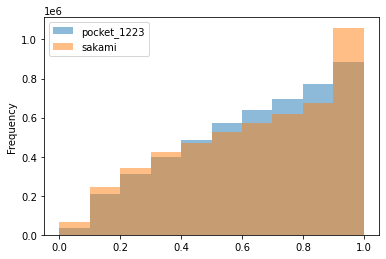

In [40]:
merged2[["pocket_1223","sakami"]].plot(kind="hist", alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

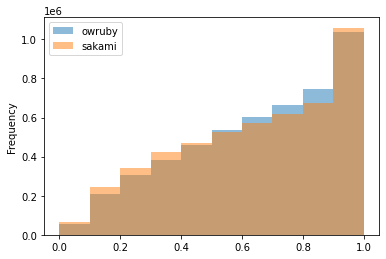

In [41]:
merged2[["owruby","sakami"]].plot(kind="hist", alpha=0.5)